#### 讀取資料

In [243]:
import pandas as pd
train = pd.read_csv("/Users/juhn/Desktop/stady_file/資料整理/鐵達尼號/train.csv",encoding="utf-8")
test = pd.read_csv("/Users/juhn/Desktop/stady_file/資料整理/鐵達尼號/test.csv",encoding="utf-8")

#### 統計缺失值

In [244]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [245]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 設定中位數 -> 數值

In [246]:
median = train.median(numeric_only=True)
train = train.fillna(median)
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [247]:
median = test.median(numeric_only=True)
test = test.fillna(median)
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

#### 設定中位數 -> most

In [248]:
most = train["Embarked"].value_counts().idxmax()
train["Embarked"] = train["Embarked"].fillna(most)
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [249]:
most = test["Embarked"].value_counts().idxmax()
test["Embarked"] = test["Embarked"].fillna(most)
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

#### One Hot Encoder

In [250]:
Encoder = pd.get_dummies(train["Embarked"]).astype("int64")
train = pd.concat([train,Encoder],axis=1)
train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
570,571,1,2,"Harris, Mr. George",male,62.00,0,0,S.W./PP 752,10.5000,NaN,S,0,0,1
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,NaN,S,0,0,1
838,839,1,3,"Chip, Mr. Chang",male,32.00,0,0,1601,56.4958,NaN,S,0,0,1
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,28.00,1,0,65304,19.9667,NaN,S,0,0,1
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C,1,0,0
257,258,1,1,"Cherry, Miss. Gladys",female,30.00,0,0,110152,86.5000,B77,S,0,0,1
761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.00,0,0,SOTON/O2 3101272,7.1250,NaN,S,0,0,1
836,837,0,3,"Pasic, Mr. Jakob",male,21.00,0,0,315097,8.6625,NaN,S,0,0,1
504,505,1,1,"Maioni, Miss. Roberta",female,16.00,0,0,110152,86.5000,B79,S,0,0,1
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.00,0,0,STON/O 2. 3101274,7.1250,NaN,S,0,0,1


In [251]:
Encoder = pd.get_dummies(test["Embarked"]).astype("int64")
test = pd.concat([test,Encoder],axis=1)
test.sample(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S,0,0,1
226,1118,3,"Asplund, Mr. Johan Charles",male,23.00,0,0,350054,7.7958,NaN,S,0,0,1
398,1290,3,"Larsson-Rondberg, Mr. Edvard A",male,22.00,0,0,347065,7.7750,NaN,S,0,0,1
353,1245,2,"Herman, Mr. Samuel",male,49.00,1,2,220845,65.0000,NaN,S,0,0,1
351,1243,2,"Stokes, Mr. Philip Joseph",male,25.00,0,0,F.C.C. 13540,10.5000,NaN,S,0,0,1
238,1130,2,"Hiltunen, Miss. Marta",female,18.00,1,1,250650,13.0000,NaN,S,0,0,1
239,1131,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.00,1,0,PC 17761,106.4250,C86,C,1,0,0
16,908,2,"Keane, Mr. Daniel",male,35.00,0,0,233734,12.3500,NaN,Q,0,1,0
106,998,3,"Buckley, Mr. Daniel",male,21.00,0,0,330920,7.8208,NaN,Q,0,1,0
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.00,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1,0,0


In [252]:
Encoder = pd.get_dummies(train["Sex"]).astype("int64")
train = pd.concat([train,Encoder],axis=1)
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
441,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5000,NaN,S,0,0,1,0,1
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S,0,0,1,1,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,S,0,0,1,1,0
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q,0,1,0,0,1
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,0,0,1,1,0
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,0,0,1,0,1
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S,0,0,1,1,0
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S,0,0,1,0,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q,0,1,0,1,0
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S,0,0,1,0,1


In [253]:
Encoder = pd.get_dummies(test["Sex"]).astype("int64")
test = pd.concat([test,Encoder],axis=1)
test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
214,1106,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,0,0,1,1,0
221,1113,3,"Reynolds, Mr. Harold J",male,21.0,0,0,342684,8.0500,NaN,S,0,0,1,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1
227,1119,3,"McNeill, Miss. Bridget",female,27.0,0,0,370368,7.7500,NaN,Q,0,1,0,1,0
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,14.4542,NaN,S,0,0,1,0,1
145,1037,3,"Vander Planke, Mr. Julius",male,31.0,3,0,345763,18.0000,NaN,S,0,0,1,0,1
326,1218,2,"Becker, Miss. Ruth Elizabeth",female,12.0,2,1,230136,39.0000,F4,S,0,0,1,1,0
27,919,3,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.2250,NaN,C,1,0,0,0,1
241,1133,2,"Christy, Mrs. (Alice Frances)",female,45.0,0,2,237789,30.0000,NaN,S,0,0,1,1,0
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,0,0,1,0


In [254]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0,0,1


In [255]:
train = train.drop(["Sex","Ticket"],axis=1)
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,NaN,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,NaN,S,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,B42,S,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,23.4500,NaN,S,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,C148,C,1,0,0,0,1


In [256]:
k = "Braund, Mr. Owen Harris"
k = k.split(",")[-1]
k = k.split(".")[0]

In [257]:
def class_dress(s):
    s = s.split(",")[-1].split(".")[0]
    s = s.replace(" ","")
    return s
name = train["Name"].apply(class_dress)

In [258]:
print(name.value_counts())

Name
Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Mlle             2
Major            2
Col              2
theCountess      1
Capt             1
Ms               1
Sir              1
Lady             1
Mme              1
Don              1
Jonkheer         1
Name: count, dtype: int64


In [259]:
pd.crosstab(name,train["Survived"]).T

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [260]:
def clean_name(s):
    d = {
        "Master":"Master",
        "Miss":"Miss",
        "Mr":"Mr",
        "Mrs":"Mrs"
    }
    return d.get(s)
name = name.apply(clean_name).sample(20)

In [261]:
name = train["Name"].apply(class_dress).apply(clean_name)
encoder = pd.get_dummies(name).astype("int64")
train = pd.concat([train,encoder],axis=1)
train = train.drop("Name",axis=1)
train.sample(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,C,Q,S,female,male,Master,Miss,Mr,Mrs
239,240,0,2,33.0,0,0,12.2750,NaN,S,0,0,1,0,1,0,0,1,0
463,464,0,2,48.0,0,0,13.0000,NaN,S,0,0,1,0,1,0,0,1,0
666,667,0,2,25.0,0,0,13.0000,NaN,S,0,0,1,0,1,0,0,1,0
703,704,0,3,25.0,0,0,7.7417,NaN,Q,0,1,0,0,1,0,0,1,0
680,681,0,3,28.0,0,0,8.1375,NaN,Q,0,1,0,1,0,0,1,0,0
742,743,1,1,21.0,2,2,262.3750,B57 B59 B63 B66,C,1,0,0,1,0,0,1,0,0
664,665,1,3,20.0,1,0,7.9250,NaN,S,0,0,1,0,1,0,0,1,0
394,395,1,3,24.0,0,2,16.7000,G6,S,0,0,1,1,0,0,0,0,1
139,140,0,1,24.0,0,0,79.2000,B86,C,1,0,0,0,1,0,0,1,0
878,879,0,3,28.0,0,0,7.8958,NaN,S,0,0,1,0,1,0,0,1,0


In [262]:
test["Name"] = test["Name"].apply(class_dress).apply(clean_name)
encoder = pd.get_dummies(test["Name"]).astype("int64")
test = pd.concat([test,encoder],axis=1)
test = test.drop(["Name","Sex","Ticket"],axis=1)
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,NaN,Q,0,1,0,0,1,0,0,1,0
1,893,3,47.0,1,0,7.0000,NaN,S,0,0,1,1,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,NaN,Q,0,1,0,0,1,0,0,1,0
3,895,3,27.0,0,0,8.6625,NaN,S,0,0,1,0,1,0,0,1,0
4,896,3,22.0,1,1,12.2875,NaN,S,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,NaN,S,0,0,1,0,1,0,0,1,0
414,1306,1,39.0,0,0,108.9000,C105,C,1,0,0,1,0,0,0,0,0
415,1307,3,38.5,0,0,7.2500,NaN,S,0,0,1,0,1,0,0,1,0
416,1308,3,27.0,0,0,8.0500,NaN,S,0,0,1,0,1,0,0,1,0


In [263]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,1,0,3,22.0,1,0,7.2500,NaN,S,0,0,1,0,1,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,C85,C,1,0,0,1,0,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,NaN,S,0,0,1,1,0,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,C123,S,0,0,1,1,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,S,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,NaN,S,0,0,1,0,1,0,0,0,0
887,888,1,1,19.0,0,0,30.0000,B42,S,0,0,1,1,0,0,1,0,0
888,889,0,3,28.0,1,2,23.4500,NaN,S,0,0,1,1,0,0,1,0,0
889,890,1,1,26.0,0,0,30.0000,C148,C,1,0,0,0,1,0,0,1,0


In [264]:
train = train.drop(["Cabin","PassengerId"],axis=1)
test = test.drop("Cabin",axis=1)


In [265]:
train = train.drop("Embarked",axis=1)

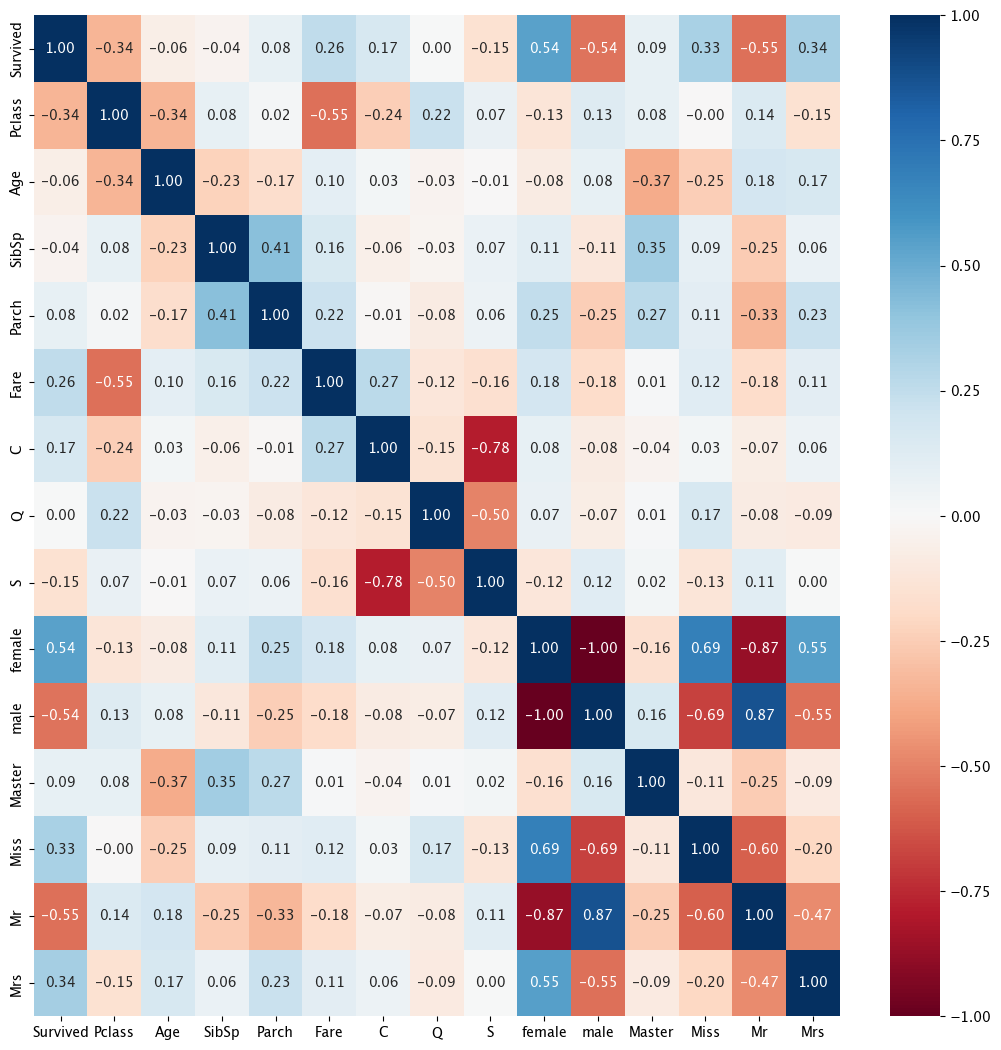

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,13))
sns.heatmap(train.corr(),annot=True,fmt=".2f",cmap="RdBu")
plt.show()

In [267]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
import numpy as np
x = train.drop("Survived",axis=1)
y = train["Survived"]
clf = RandomForestClassifier(max_depth=10,n_estimators=100)
np.average(cross_val_predict(clf,x,y,cv=20))


np.float64(0.3479236812570146)

In [268]:
from sklearn.model_selection import GridSearchCV
p = {
    "max_depth":list(range(5,21)),
    "n_estimators":list(range(20,31))
}
s = GridSearchCV(clf,p,cv=5)
s.fit(x,y)
print(s.best_params_)
print(s.best_score_)


{'max_depth': 9, 'n_estimators': 24}
0.8316552633230808


In [269]:
test = test.drop("Embarked",axis=1)

In [270]:
testx = test.drop(["PassengerId"],axis=1)
testid = test["PassengerId"]
clf = RandomForestClassifier(max_depth=7,n_estimators=24)
clf.fit(x,y)
pre = clf.predict(testx)
result = pd.DataFrame()
result["PassengerId"] = testid
result["Survived"] = pre
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
